In [ ]:
# Here is a template for w_ipa analysis of WESTPA results

# 1. fist, modify the analysis part in west.cfg to make it look like:

### a.  devide the configurational space into parts according to boundaries. ###
# target state --distance: the distance of reactive carbon from cysteine sulfur should be very small around 3A(have chance to make bond)
                           #if distance is larger than 5A, there'll be no molecular interactions
# target state -- rmsd : rmsd don't have too much limitations, but just use 5A as a boundary here
               
# analysis:
#      directory: ANALYSIS_2D             # specify the directory all analysis files should exist in.
#      kinetics:                          # general options for both kinetics routines.
#        step_iter: 1 
#        evolution: cumulative
#        extra: [ 'disable-correl' ]
#      analysis_schemes:                  # Analysis schemes.  Required: name (TEST_2D) ,states, and bins
#        TEST_2D:
#          enabled: True                
#          bins:
#            - type: RectilinearBinMapper
#              boundaries:                     #correlates to the order(index) of pcoord in west.cfg
#                - [0.0, 5.0, 'inf']           #rmsd
#                - [0.0, 3.1, 5.0, 'inf']      #dis

### b.  based on the blocks (devided configurational space) , set up the trajectory state boundary ### 

#          states:
#            - label: unbound             # the unbound state index is 0
#              coords: 
#                - [5.1, 5.1]             # first figure(5.1) is 'unbound' definition for rmsd, second(5.1) is 'unbound' definition for dis
#            - label: bound               # the bound state index is 1
#              coords: 
#                - [4.9, 3.0]             # first figure(4.9) is 'bound' definition for rmsd, second(3.0) is 'bound' definition for dis
               

### REFERENCE:
# w_ipa set up in WESTPA.2.0 tutorial
# https://westpa.readthedocs.io/en/latest/users_guide/west/analysis.html ###



In [1]:

## I prefer to use jupyter notebook, but it could also be done using 'w_ipa -ao' in terminal, see details in tutorial

from westpa.cli.tools import w_ipa
from westpa.cli.tools.w_ipa import WIPI

w = WIPI()

In [61]:
# run the w_ipa
w.main()

In [ ]:
# after w.main. there'll be a new directory occuring in the directory, here is named ANALYSIS_2D(as you defined)
# there're 2 files in this ANALYSIS_2D, one is assign.h5, one is direct.h5, the latter contains the fluxes and other useful data


In [8]:
# as all the analysis are based on the h5 file, so you may want to check the data frame of it

import h5py
import numpy as np

def print_hdf5_structure(name, obj):
    print(name)
    if isinstance(obj, h5py.Dataset):
        print(f"  Shape: {obj.shape}, Dtype: {obj.dtype}")

with h5py.File('/E166V_8H82/ANALYSIS_2D/TEST_2D/direct.h5', 'r') as f:
    f.visititems(print_hdf5_structure)


# list(direct.h5): [‘arrivals’, ‘avg_color_probs’, ‘avg_conditional_fluxes’, ‘avg_rates’, ‘avg_state_probs’, ‘avg_total_fluxes’, ‘color_prob_evolution’, ‘conditional_arrivals’, ‘conditional_flux_evolution’, ‘conditional_fluxes’, ‘duration_count’, ‘durations’, ‘rate_evolution’, ‘state_labels’, ‘state_pop_evolution’, ‘target_flux_evolution’, ‘total_fluxes’]

arrivals
  Shape: (50, 2), Dtype: uint64
avg_color_probs
  Shape: (2,), Dtype: [('iter_start', '<u4'), ('iter_stop', '<u4'), ('expected', '<f8'), ('ci_lbound', '<f8'), ('ci_ubound', '<f8'), ('sterr', '<f8'), ('corr_len', '<u4')]
avg_conditional_fluxes
  Shape: (2, 2), Dtype: [('iter_start', '<u4'), ('iter_stop', '<u4'), ('expected', '<f8'), ('ci_lbound', '<f8'), ('ci_ubound', '<f8'), ('sterr', '<f8'), ('corr_len', '<u4')]
avg_rates
  Shape: (2, 2), Dtype: [('iter_start', '<u4'), ('iter_stop', '<u4'), ('expected', '<f8'), ('ci_lbound', '<f8'), ('ci_ubound', '<f8'), ('sterr', '<f8'), ('corr_len', '<u4')]
avg_state_probs
  Shape: (2,), Dtype: [('iter_start', '<u4'), ('iter_stop', '<u4'), ('expected', '<f8'), ('ci_lbound', '<f8'), ('ci_ubound', '<f8'), ('sterr', '<f8'), ('corr_len', '<u4')]
avg_total_fluxes
  Shape: (2,), Dtype: [('iter_start', '<u4'), ('iter_stop', '<u4'), ('expected', '<f8'), ('ci_lbound', '<f8'), ('ci_ubound', '<f8'), ('sterr', '<f8'), ('corr_len', '<u4')]
color_prob_ev

In [1]:

#take a look of target_flux_evolution data (50,2), if you want lol

import h5py
import numpy as np
import pandas as pd

# Define the file path
file_path = '/E166V_8H82/ANALYSIS_2D/TEST_2D/direct.h5'

##Open the HDF5 file and read the data
with h5py.File(file_path, 'r') as f:
    target_flux_data = f['target_flux_evolution'][()]
    print("\ntarget_flux_evolution:")
    print(target_flux_data)

    if 'state_labels' in f:
        state_labels = f['state_labels'][()]
        print("\nState labels:")
        print(state_labels)

    # Read file attributes
    print("\nFile attributes:")
    for key, value in f.attrs.items():
        print(f"{key}: {value}")


##covert it into dataframe(thx gpt!)
# Flatten the list of tuples from the nested structure
# In this context, first convert the structured array to plain list of tuples
flattened_data = [tuple(row) for sublist in target_flux_data for row in sublist]

# Define the DataFrame with appropriate column names
df = pd.DataFrame(flattened_data, columns=['iter_start', 'iter_stop', 'expected', 'ci_lbound', 'ci_ubound', 'sterr', 'corr_len'])

# Display the DataFrame
print("\nConverted DataFrame:")
print(df)


target_flux_evolution:
[[(1,  2, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)
  (1,  2, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)]
 [(1,  3, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)
  (1,  3, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)]
 [(1,  4, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)
  (1,  4, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)]
 [(1,  5, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)
  (1,  5, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)]
 [(1,  6, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)
  (1,  6, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)]
 [(1,  7, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)
  (1,  7, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0)]
 [(1,  8, 0.00000000e+00, 0.00000000e+00, 0.00

In [11]:
### extract the flux values ###
# In the ['target_flux_evolution']['expected'] array, it gives the flux over time (number of WE iterations) into each state we labeled earlier.
# So values here should be the flux into state 0 (unbound) and then state 1(bound)


import h5py
import numpy as np

# open HDF5 file
with h5py.File('/E166V_8H82/ANALYSIS_2D/TEST_2D/direct.h5', 'r') as f:
    # 读取 target_flux_evolution 数据集
    data = f['target_flux_evolution'][:]

# extract `expected` value
expected_values_bound = data[:, 1]['expected']  # flux into  1 (bound)
expected_values_unbound = data[:, 0]['expected']  # flux into 0 (unbound)

print("Expected values for bound state:")
print(expected_values_bound)

print("Expected values for unbound state:")
print(expected_values_unbound)




Expected values for bound state:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.96352399e-11
 1.43565893e-10 1.80691373e-10 2.52898030e-10 2.91066497e-10
 3.68564522e-10 4.32400583e-10 2.50891298e-09 2.45979366e-09
 3.06613775e-09 3.52544596e-09]
Expected values for unbound state:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 

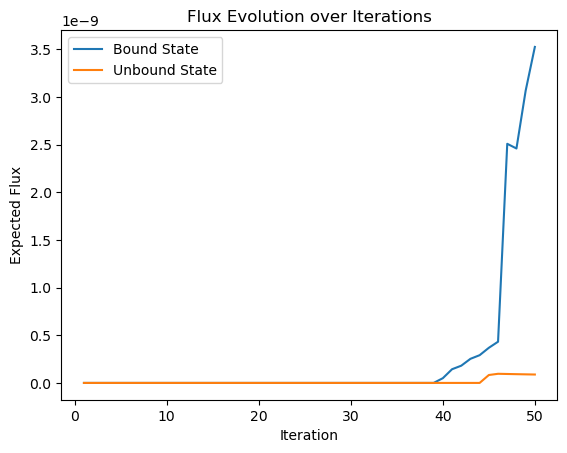

In [12]:
### plot the flux data ###

import matplotlib.pyplot as plt


iterations = np.arange(1, 51)

plt.plot(iterations, expected_values_bound, label='Bound State')
plt.plot(iterations, expected_values_unbound, label='Unbound State')

plt.xlabel('Iteration')
plt.ylabel('Expected Flux')
plt.legend()
plt.title('Flux Evolution over Iterations')
plt.show()



In [2]:

# rate_evolution data could be easily read and plot by module in wedap

import wedap
import matplotlib.pyplot as plt
from wekap import Kinetics

/home/fuyao/.conda/envs/WESTPA/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.49635999,
        1.4356825 ,  1.80694597,  2.52902924,  2.91072587,  3.68572848,
        4.32411127, 25.08978711, 24.5986222 , 30.66227934, 35.25555031])

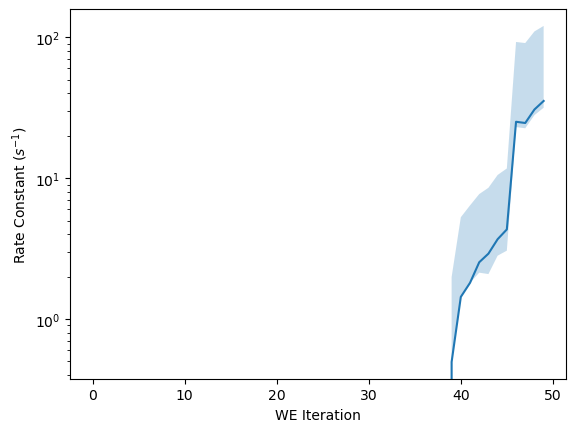

In [3]:
direct_h5_path = '/E166V_8H82/ANALYSIS_2D/TEST_2D/direct.h5'


state = 1  # State for flux calculations

kinetics = Kinetics(direct=direct_h5_path, state=state)
# Extract raw rate array
raw_rates = kinetics.extract_rate()

# Plot the rate constant, which is the target flux evolution AB / P_A
kinetics.plot_rate()



In [ ]:
## other useful modules within w_ipa is in tutprial(from page 26)

In [19]:
w.current

['aggregate_walkers', 'auxdata', 'bins', 'color_prob_evolution', 'conditional_flux_evolution', 'direct', 'instant_matrix', 'iteration', 'matrix', 'maxweight', 'minweight', 'parent', 'parents', 'pcoord', 'rate_evolution', 'raw', 'reweight', 'seg_id', 'state_pop_evolution', 'states', 'successful_trajectories', 'summary', 'target_flux_evolution', 'total_fluxes', 'walkers', 'weights']

In [22]:
# The w_ipa tool works by presenting an iteration and all its
# data as a single object. Each iteration object contains numer-
# ous datasets and helper functions designed to ease analysis.
# After loading, w_ipa defaults to the final iteration. You can
# change the iteration by using the following command:
# $ w.iteration = 39
w.iteration = 49


Setting iteration to iter 49.


Evolution: 100%|██████████| 50/50 [00:05<00:00,  9.96it/s]


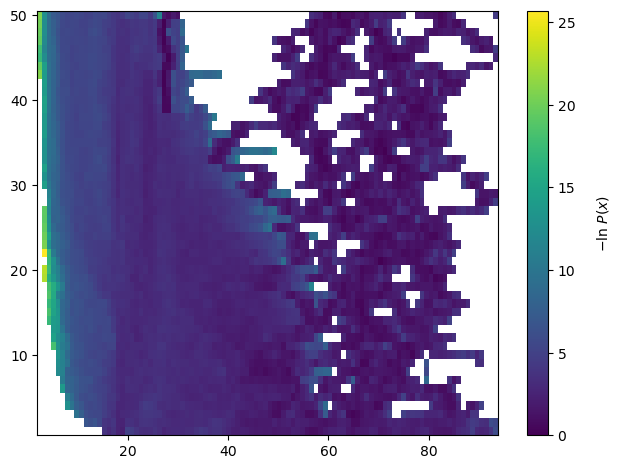

In [5]:

## wedap could also conduct many analysis directly.

import wedap
import matplotlib.pyplot as plt

wedap.H5_Plot(h5="/E166V_8H82/west.h5", data_type="evolution").plot()
plt.show()